# Classification. Data preparation

Data from this competition https://www.kaggle.com/c/shelter-animal-outcomes

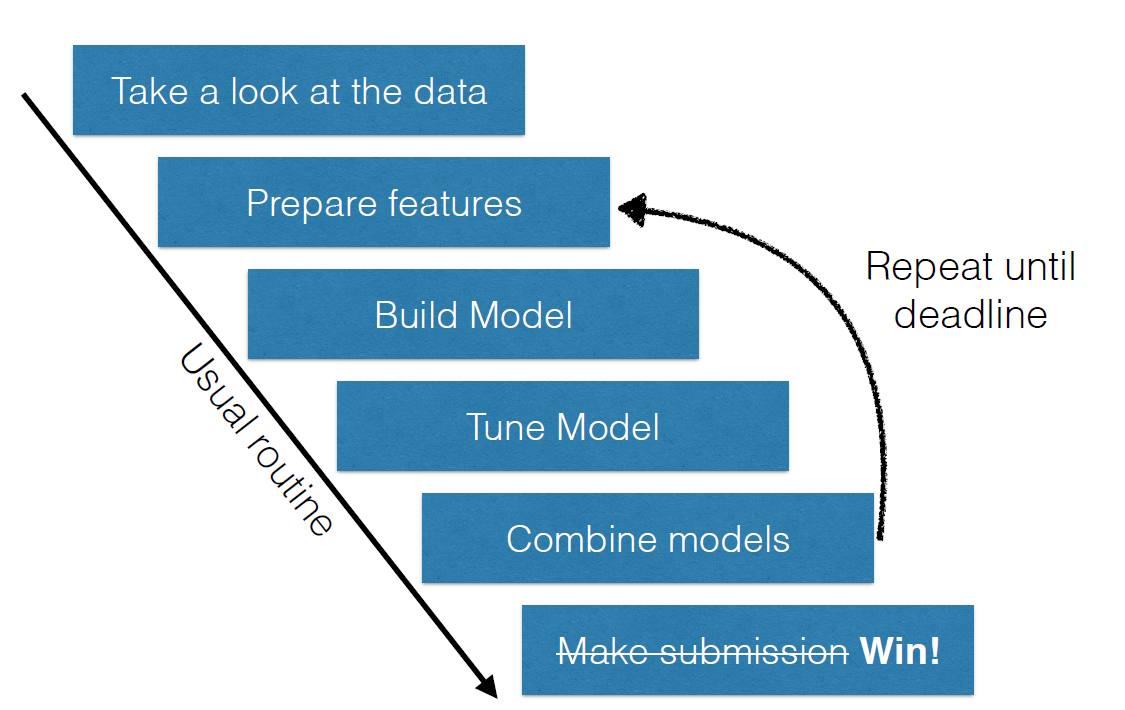

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### Read data

In [17]:
train = pd.read_csv(r'C:\Users\310\Desktop\Progects_Py\ML-course-at-ICEF\data\train.csv')
test = pd.read_csv(r'C:\Users\310\Desktop\Progects_Py\ML-course-at-ICEF\data\test.csv')

In [3]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (26729, 10)
Test shape: (11456, 8)


In [4]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [5]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


Let's look at our target

In [6]:
outcome = train.OutcomeType

In [7]:
outcome.value_counts(normalize=True)

Adoption           0.402896
Transfer           0.352501
Return_to_owner    0.179056
Euthanasia         0.058177
Died               0.007370
Name: OutcomeType, dtype: float64

<Axes: ylabel='OutcomeType'>

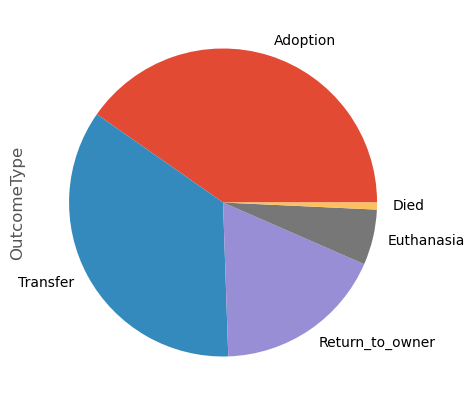

In [8]:
outcome.value_counts().plot(kind='pie', figsize=(5,5))

#### Task: Drop columns that we cannot use for training

Hint: let's assume that you cannot use: 	AnimalID	OutcomeType	OutcomeSubtype and ID

In [14]:
test

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
...,...,...,...,...,...,...,...,...
11451,11452,NaN,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
11452,11453,NaN,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue
11453,11454,NaN,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico
11454,11455,Rambo,2015-09-05 17:16:00,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan


In [18]:

train = train.drop(['AnimalID', 'OutcomeType', 'OutcomeSubtype'], axis=1)
test = test.drop(['ID'], axis=1)


In [11]:
train.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Test
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,False
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False


In [19]:
test.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


Let's combine the tables in one dataset in order to conduct feature engineering simultaneously. Create an additional column called Test

In [20]:
train['Test'] = False
test['Test'] = True

In [21]:
data = pd.concat([train, test], ignore_index=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38185 entries, 0 to 38184
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            27269 non-null  object
 1   DateTime        38185 non-null  object
 2   AnimalType      38185 non-null  object
 3   SexuponOutcome  38184 non-null  object
 4   AgeuponOutcome  38161 non-null  object
 5   Breed           38185 non-null  object
 6   Color           38185 non-null  object
 7   Test            38185 non-null  bool  
dtypes: bool(1), object(7)
memory usage: 2.1+ MB


### Start

#### Task: Check NAs

In [33]:
data.isna().sum()

Name              10916
DateTime              0
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       24
Breed                 0
Color                 0
Test                  0
dtype: int64

#### Task: Plot some pictures

Hint: One pie chart for AnimalType and one bar chart for top-20 Breeds and top-20 Colors

In [26]:
data.AnimalType.value_counts()

AnimalType
Dog    22251
Cat    15934
Name: count, dtype: int64

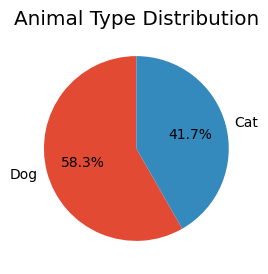

In [34]:
plt.figure(figsize=(3,3))

animal_type_counts = data['AnimalType'].value_counts()
plt.pie(animal_type_counts, labels=animal_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Animal Type Distribution')

plt.show()

In [36]:
data

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Test
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,False
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False
...,...,...,...,...,...,...,...,...
38180,NaN,2014-07-08 14:50:00,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,True
38181,NaN,2014-10-21 12:57:00,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue,True
38182,NaN,2014-09-29 09:00:00,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico,True
38183,Rambo,2015-09-05 17:16:00,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan,True


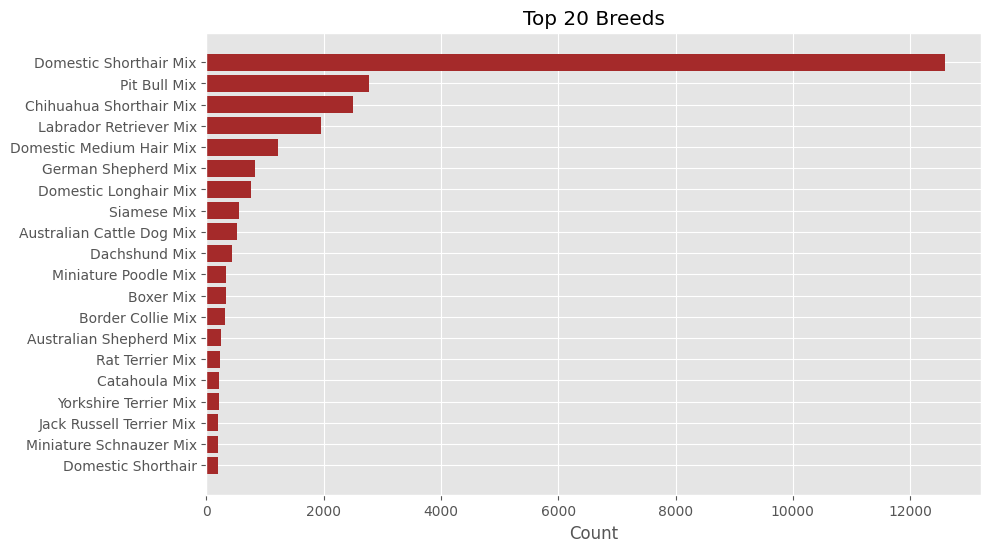

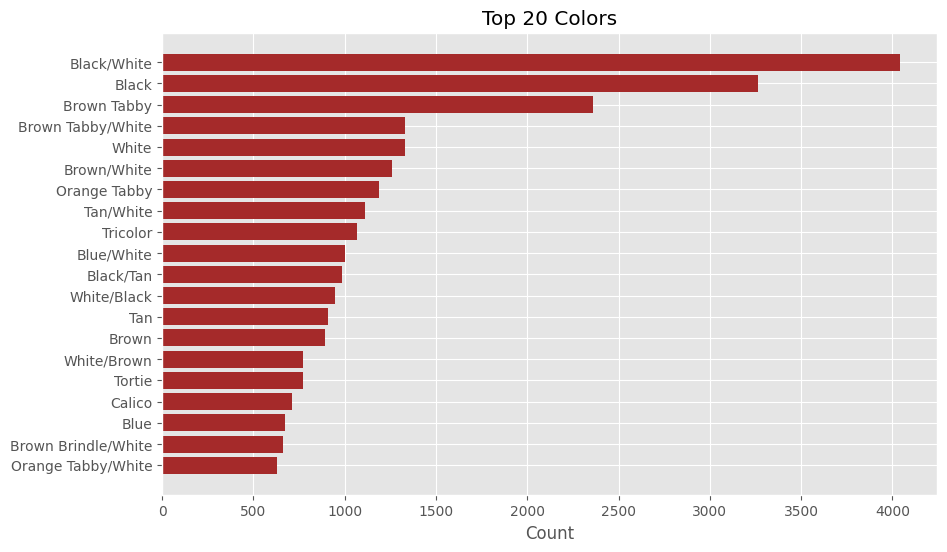

In [37]:
# try to do it one line
top_20_breeds = data['Breed'].value_counts().head(20)
top_20_colors = data['Color'].value_counts().head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_20_breeds.index, top_20_breeds.values, color='brown')
plt.gca().invert_yaxis()  
plt.title('Top 20 Breeds')
plt.xlabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(top_20_colors.index, top_20_colors.values, color='brown')
plt.gca().invert_yaxis()  
plt.title('Top 20 Colors')
plt.xlabel('Count')
plt.show()

#### Task: Let's create some features and start with IsDog

It's just a binary encoding of an `AnimalType` column

In [39]:
data.columns

Index(['Name', 'DateTime', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome',
       'Breed', 'Color', 'Test'],
      dtype='object')

In [40]:
data['AnimalType'].unique()

array(['Dog', 'Cat'], dtype=object)

In [43]:
data['IsDog'] = data.apply(lambda x: 1 if x['AnimalType'] == 'Dog' else 0, axis=1 )

In [44]:
data.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Test,IsDog
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False,1
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False,0
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,False,1
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False,0
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False,1


#### Task: Drop AnimalType column

In [45]:
data.drop(['AnimalType'], axis=1, inplace=True)

#### Task: Let's trasnform the Age. What are unique date intervals are given in the data?

In [25]:
# try to do it one line without loops
#unclear task 

array(['year', 'years', 'weeks', 'month', 'months', 'days', 'week', 'day',
       nan], dtype=object)

#### Task: Get digit from AgeuponOutcome and replace values of time intervals with number of days in them
Hint: `{'year':365, 'month':30, 'week':7, 'day':1}`

,Name,DateTime,SexuponOutcome,AgeuponOutcome,Breed,Color,Test,IsDog
0,Hambone,2014-02-12 18:22:00,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,False,1
1,Emily,2013-10-13 12:44:00,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,False,0
2,Pearce,2015-01-31 12:28:00,Neutered Male,2 years,Pit Bull Mix,Blue/White,False,1
3,NaN,2014-07-11 19:09:00,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,False,0
4,NaN,2013-11-15 12:52:00,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,False,1
...,...,...,...,...,...,...,...,...
38180,NaN,2014-07-08 14:50:00,Neutered Male,2 months,Domestic Shorthair Mix,Black,True,0
38181,NaN,2014-10-21 12:57:00,Intact Female,2 weeks,Domestic Shorthair Mix,Blue,True,0
38182,NaN,2014-09-29 09:00:00,Intact Female,1 year,Domestic Shorthair Mix,Calico,True,0
38183,Rambo,2015-09-05 17:16:00,Neutered Male,6 years,German Shepherd Mix,Black/Tan,True,1


In [26]:
#UNCLEAR TASK
digit = pass
calen = pass

In [27]:
digit.head()

0    1.0
1    1.0
2    2.0
3    3.0
4    2.0
Name: AgeuponOutcome, dtype: float64

In [28]:
calen.head()

0    365.0
1    365.0
2    365.0
3      7.0
4    365.0
Name: AgeuponOutcome, dtype: float64

#### Task: Finally calculate age in days

You need to use `digit` and `calen`

In [52]:
data['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       nan, '17 years', '18 years', '19 years', '20 years', '22 years'],
      dtype=object)

In [56]:
days_dict = {'year':365, 'month':30, 'week':7, 'day':1}
def get_age(string):
    if not isinstance(string, str):
        return None

    lst = string.split(' ')
    if lst[1][-1] == 's':
        calen = lst[1][:-1]
    else:
        calen = lst[1]
    age_in_days = days_dict[calen] * int(lst[0])
    return age_in_days

data['Age'] = data['AgeuponOutcome'].apply(get_age)

In [52]:
data.drop('AgeuponOutcome', axis=1, inplace=True)

In [53]:
data.head()

,Name,DateTime,SexuponOutcome,Breed,Color,Test,IsDog,Age
0,Hambone,2014-02-12 18:22:00,Neutered Male,Shetland Sheepdog Mix,Brown/White,False,1,365.0
1,Emily,2013-10-13 12:44:00,Spayed Female,Domestic Shorthair Mix,Cream Tabby,False,0,365.0
2,Pearce,2015-01-31 12:28:00,Neutered Male,Pit Bull Mix,Blue/White,False,1,730.0
3,NaN,2014-07-11 19:09:00,Intact Male,Domestic Shorthair Mix,Blue Cream,False,0,21.0
4,NaN,2013-11-15 12:52:00,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,False,1,730.0


#### What did we miss here?? Task: Check NAs and distribution of age, and for now fill it with 0's

You can use `.fillna(0)` or `data.loc[pass, 'Age'] = pass` construction

24

<Axes: >

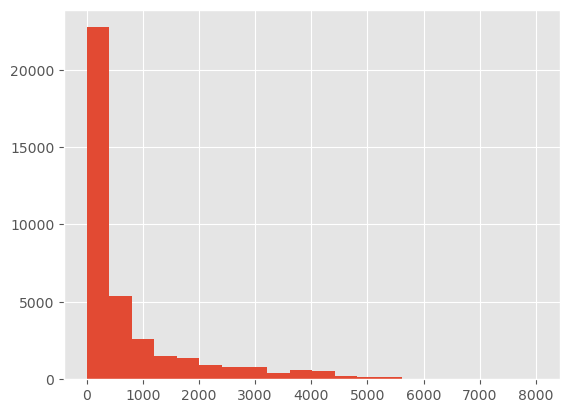

In [55]:
data.loc[pass, 'Age'] = pass

Let's work with names

In [56]:
data.head()

,Name,DateTime,SexuponOutcome,Breed,Color,Test,IsDog,Age
0,Hambone,2014-02-12 18:22:00,Neutered Male,Shetland Sheepdog Mix,Brown/White,False,1,365.0
1,Emily,2013-10-13 12:44:00,Spayed Female,Domestic Shorthair Mix,Cream Tabby,False,0,365.0
2,Pearce,2015-01-31 12:28:00,Neutered Male,Pit Bull Mix,Blue/White,False,1,730.0
3,NaN,2014-07-11 19:09:00,Intact Male,Domestic Shorthair Mix,Blue Cream,False,0,21.0
4,NaN,2013-11-15 12:52:00,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,False,1,730.0


#### Task: Create a feature HasName -- it might be correlated with our target

Check whether it's NA or not

In [57]:
data['HasName'] = pass

In [58]:
data.loc[data.Name.isnull(), 'Name'] = 'Unknown'

#### Task: Create a feature Name Length and Name Frequencies -- it might be correlated with our target

Hint: you can use value_counts() for creating name frequencies

In [59]:
data['NameLength'] = pass

In [61]:

data['NameFreq'] = pass

In [62]:
data.drop('Name', axis=1, inplace=True)

In [63]:
data.head()

,DateTime,SexuponOutcome,Breed,Color,Test,IsDog,Age,HasName,NameLength,NameFreq
0,2014-02-12 18:22:00,Neutered Male,Shetland Sheepdog Mix,Brown/White,False,1,365.0,1,7,0.000157
1,2013-10-13 12:44:00,Spayed Female,Domestic Shorthair Mix,Cream Tabby,False,0,365.0,1,5,0.000655
2,2015-01-31 12:28:00,Neutered Male,Pit Bull Mix,Blue/White,False,1,730.0,1,6,0.000052
3,2014-07-11 19:09:00,Intact Male,Domestic Shorthair Mix,Blue Cream,False,0,21.0,0,7,0.285871
4,2013-11-15 12:52:00,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,False,1,730.0,0,7,0.285871


#### Adding features about sex

No tasks here, just run the code

In [64]:
data.SexuponOutcome.value_counts()

Neutered Male    14014
Spayed Female    12633
Intact Female     5004
Intact Male       4985
Unknown           1548
Name: SexuponOutcome, dtype: int64

In [70]:
data.loc[data.SexuponOutcome.isnull(), 'SexuponOutcome'] = 'Unknown'
data['Sex'] = data.SexuponOutcome.str.split().str[-1]
data['SexStatus'] = data.SexuponOutcome.str.split().str[0].replace({'Neutered': 'Flawed', 'Spayed': 'Flawed'})

In [71]:
data.head()

,DateTime,SexuponOutcome,Breed,Color,Test,IsDog,Age,HasName,NameLength,NameFreq,Sex,SexStatus
0,2014-02-12 18:22:00,Neutered Male,Shetland Sheepdog Mix,Brown/White,False,1,365.0,1,7,0.000157,Male,Flawed
1,2013-10-13 12:44:00,Spayed Female,Domestic Shorthair Mix,Cream Tabby,False,0,365.0,1,5,0.000655,Female,Flawed
2,2015-01-31 12:28:00,Neutered Male,Pit Bull Mix,Blue/White,False,1,730.0,1,6,0.000052,Male,Flawed
3,2014-07-11 19:09:00,Intact Male,Domestic Shorthair Mix,Blue Cream,False,0,21.0,0,7,0.285871,Male,Intact
4,2013-11-15 12:52:00,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,False,1,730.0,0,7,0.285871,Male,Flawed


In [72]:
data.Age.groupby(data.SexStatus).mean()

SexStatus
Flawed     917.497842
Intact     530.423366
Unknown    223.615881
Name: Age, dtype: float64

In [73]:
data.drop('SexuponOutcome', axis=1, inplace=True)

In [74]:
data.head()

,DateTime,Breed,Color,Test,IsDog,Age,HasName,NameLength,NameFreq,Sex,SexStatus
0,2014-02-12 18:22:00,Shetland Sheepdog Mix,Brown/White,False,1,365.0,1,7,0.000157,Male,Flawed
1,2013-10-13 12:44:00,Domestic Shorthair Mix,Cream Tabby,False,0,365.0,1,5,0.000655,Female,Flawed
2,2015-01-31 12:28:00,Pit Bull Mix,Blue/White,False,1,730.0,1,6,0.000052,Male,Flawed
3,2014-07-11 19:09:00,Domestic Shorthair Mix,Blue Cream,False,0,21.0,0,7,0.285871,Male,Intact
4,2013-11-15 12:52:00,Lhasa Apso/Miniature Poodle,Tan,False,1,730.0,0,7,0.285871,Male,Flawed


#### Task: Now let's work with color -- add new feature MixColor if Color contains a word Mix and new feature with Color Frequencies ColorFreqAsIs

Hint: you can use value_counts() for creating frequencies

In [75]:
data['MixColor'] = pass

In [84]:

data['ColorFreqAsIs'] = pass

* Check cases when B/W == W/B

In [76]:
colors = [color.split()[0] for pair in data.Color.str.split('/') for color in pair]

In [77]:
base_color_freq = pd.Series(colors).value_counts(normalize=True).to_dict()

In [78]:
data['ColorFreqBase'] = data.Color.apply(lambda x: sum(base_color_freq[color.split()[0]] for color in x.split('/')))

#### Task: Do the same for Tabby and Cream colors

It's the same construction as with Mix Color

In [82]:
data['CreamColor'] = pass
data['TabbyColor'] = pass

In [80]:
data.drop('Color', axis=1, inplace=True)

#### Task: Breed -- apply the same logic for MixBreed, Domestic, Shorthair and Longhair

The same but for breed

In [101]:
data['MixBreed'] = data.Breed.str.endswith('Mix').astype(int)
data['Domestic'] = pass
data['Shorthair'] = pass
data['Longhair'] = pass

In [104]:
data.Breed.value_counts(normalize=True).cumsum()[:10]

Domestic Shorthair Mix       0.329632
Pit Bull Mix                 0.402331
Chihuahua Shorthair Mix      0.467749
Labrador Retriever Mix       0.518790
Domestic Medium Hair Mix     0.550661
German Shepherd Mix          0.572398
Domestic Longhair Mix        0.592117
Siamese Mix                  0.606835
Australian Cattle Dog Mix    0.620270
Dachshund Mix                0.631714
Name: Breed, dtype: float64

#### Task: Create feature with top-6 Breeds 
if breed not in top-6 then put 'Rare' category

In [84]:

data['Breed'] = pass

#### Task: Create some features from dates 

You can use `dates.dt` or `.apply` as in example

In [85]:
dates = data.DateTime.astype(np.datetime64)

In [121]:
data['Year'] = dates.apply(lambda x: x.year)
data['Month'] = pass
data['Day'] = pass
data['Hour'] = pass
data['Weekday'] = pass

In [103]:
data.drop('DateTime', axis=1, inplace=True)

#### Task: Convert categorical fearutes to binaries

Let's add it for 'Breed', 'Sex', 'SexStatus', 'Weekday'

In [113]:
data = pass

In [115]:
data.head()

,Test,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqAsIs,ColorFreqBase,CreamColor,...,SexStatus_Flawed,SexStatus_Intact,SexStatus_Unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,False,1,365.0,1,7,0.000157,0,0.032919,0.463624,0,...,1,0,0,0,0,1,0,0,0,0
1,False,0,365.0,1,5,0.000655,0,0.008092,0.015005,1,...,1,0,0,0,0,0,0,0,0,1
2,False,1,730.0,1,6,0.000052,0,0.026293,0.357521,0,...,1,0,0,0,0,0,0,0,1,0
3,False,0,21.0,0,7,0.285871,0,0.000471,0.058418,1,...,0,1,0,0,0,0,0,1,0,0
4,False,1,730.0,0,7,0.285871,0,0.023831,0.075353,0,...,1,0,0,0,0,0,0,1,0,0


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38185 entries, 0 to 38184
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DateTime                        38185 non-null  object 
 1   Test                            38185 non-null  bool   
 2   IsDog                           38185 non-null  int64  
 3   Age                             38185 non-null  float64
 4   HasName                         38185 non-null  int64  
 5   NameLength                      38185 non-null  int64  
 6   NameFreq                        38185 non-null  float64
 7   MixColor                        38185 non-null  int64  
 8   ColorFreqBase                   38185 non-null  float64
 9   CreamColor                      38185 non-null  int64  
 10  TabbyColor                      38185 non-null  int64  
 11  MixBreed                        38185 non-null  int64  
 12  Domestic                        

In [90]:
data.describe()

,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqBase,CreamColor,TabbyColor,MixBreed,...,SexStatus_Flawed,SexStatus_Intact,SexStatus_Unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
count,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.0,38185.000000,38185.000000,38185.000000,38185.000000,...,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000,38185.000000
mean,0.582716,788.093361,0.714129,5.985020,0.082154,0.0,0.256684,0.024015,0.193898,0.572398,...,0.697839,0.261595,0.040566,0.141941,0.144428,0.130680,0.126280,0.133167,0.162001,0.161503
std,0.493117,1079.884151,0.451834,1.539866,0.128896,0.0,0.173034,0.153097,0.395355,0.494737,...,0.459200,0.439509,0.197284,0.348994,0.351528,0.337054,0.332169,0.339760,0.368456,0.367999
min,0.000000,0.000000,0.000000,1.000000,0.000026,0.0,0.000052,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.000000,0.000000,5.000000,0.000105,0.0,0.075353,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,365.000000,1.000000,6.000000,0.000576,0.0,0.274622,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1095.000000,1.000000,7.000000,0.285871,0.0,0.463624,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8030.000000,1.000000,12.000000,0.285871,0.0,0.598205,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


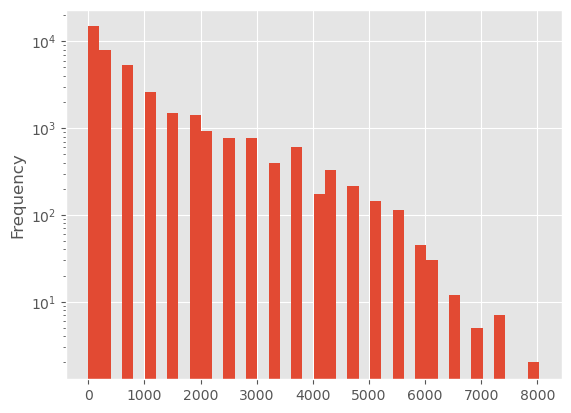

In [91]:
data.Age.plot(kind='hist', logy=True, bins=40);

In [92]:
import scipy.stats as ss

In [93]:
ss.pearsonr(data.Test, data.NameFreq)

PearsonRResult(statistic=-0.006332912106422371, pvalue=0.21590702483855512)

/var/folders/gv/k52rb94x2m54mddyj3df24880000gq/T/ipykernel_7972/253228321.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  img = ax.matshow(data.corr(), vmin=-1, vmax=1)


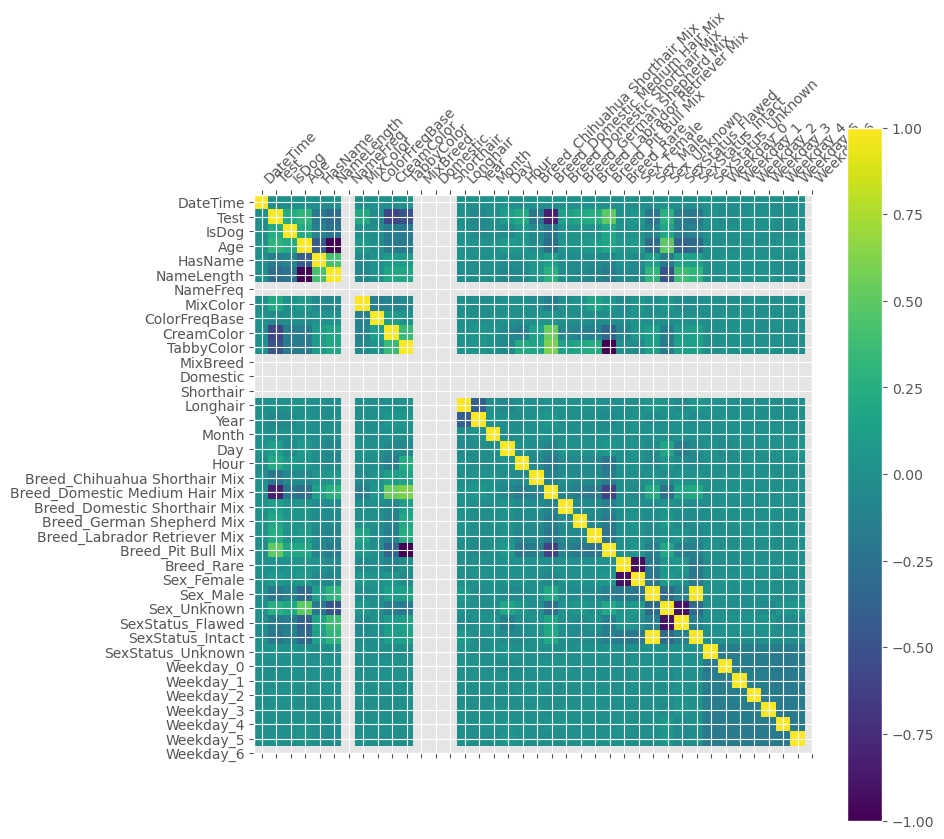

In [94]:
fig, ax = plt.subplots(figsize=(9, 9))
img = ax.matshow(data.corr(), vmin=-1, vmax=1)
plt.yticks(range(data.shape[1]), data.columns)
plt.xticks(range(data.shape[1]), data.columns, rotation=45, ha="left" )
plt.colorbar(mappable=img, )
plt.show()

Optimize memory a little bit

In [95]:
for col in data.columns:
    if set(data[col]) == set((0,1)):
        data[col] = data[col].astype(np.int8)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38185 entries, 0 to 38184
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DateTime                        38185 non-null  object 
 1   Test                            38185 non-null  int8   
 2   IsDog                           38185 non-null  int8   
 3   Age                             38185 non-null  float64
 4   HasName                         38185 non-null  int8   
 5   NameLength                      38185 non-null  int64  
 6   NameFreq                        38185 non-null  float64
 7   MixColor                        38185 non-null  int64  
 8   ColorFreqBase                   38185 non-null  float64
 9   CreamColor                      38185 non-null  int8   
 10  TabbyColor                      38185 non-null  int8   
 11  MixBreed                        38185 non-null  int8   
 12  Domestic                        

In [97]:
data.isnull().sum()

DateTime                          0
Test                              0
IsDog                             0
Age                               0
HasName                           0
NameLength                        0
NameFreq                          0
MixColor                          0
ColorFreqBase                     0
CreamColor                        0
TabbyColor                        0
MixBreed                          0
Domestic                          0
Shorthair                         0
Longhair                          0
Year                              0
Month                             0
Day                               0
Hour                              0
Breed_Chihuahua Shorthair Mix     0
Breed_Domestic Medium Hair Mix    0
Breed_Domestic Shorthair Mix      0
Breed_German Shepherd Mix         0
Breed_Labrador Retriever Mix      0
Breed_Pit Bull Mix                0
Breed_Rare                        0
Sex_Female                        0
Sex_Male                    

In [98]:
data.Age.median()

365.0

#### Optional task: Replace cases with Age=0 

Fit linear regression for samples with age != 0 ...

In [139]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [160]:
X = data.loc[pass]
y = data.loc[pass]

In [161]:
lr.fit(X, y)

LinearRegression()

In [163]:
pd.Series(lr.coef_, index=data.columns[(data.columns != 'Age') & (data.columns != 'Test')]).sort_values()

ColorFreqAsIs                    -3.714378e+02
ColorFreqBase                    -2.118654e+02
Breed_Domestic Shorthair Mix     -1.949353e+02
Breed_Domestic Medium Hair Mix   -1.776828e+02
CreamColor                       -1.080479e+02
SexStatus_Intact                 -6.827486e+01
TabbyColor                       -4.261964e+01
Weekday_5                        -3.451517e+01
Sex_Unknown                      -3.438187e+01
SexStatus_Unknown                -3.438187e+01
Breed_Pit Bull Mix               -3.395938e+01
Hour                             -2.780271e+01
Weekday_0                        -1.897828e+01
Weekday_6                        -1.599340e+01
Weekday                          -1.566070e+01
Breed_German Shepherd Mix        -1.301333e+01
Month                            -1.197689e+01
Weekday_1                        -3.659259e+00
Year                             -2.723155e+00
Day                              -8.448131e-01
Weekday_2                        -7.673120e-01
MixColor     

#### Optional task: ... and then use it to predict age for samples with age == 0

In [165]:
predictions = lr.predict(data.loc[pass])
agepred = np.maximum(predictions, 7)

#### Assign them to Age

In [168]:
data.loc[pass] = pass

In [171]:
data.loc[data.Age < 0.00001]

,Test,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqAsIs,ColorFreqBase,CreamColor,...,SexStatus_Intact,SexStatus_Unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weekday


Save the data for further work

In [169]:
train = data[data.Test == 0].drop('Test', axis=1).copy()
test = data[data.Test == 1].drop('Test', axis=1).copy()

In [152]:
train.to_pickle('train_prep.pkl')
test.to_pickle('test_prep.pkl')